In [3]:
from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google.colab'

This file has the code for creating the RNN.

In [21]:
import os

# Folder path in Google Drive
train_folder_path = './train/Inertial_Signals/'
test_folder_path = './test/Inertial_Signals/'

# File paths
def return_filepath(train_or_test):
    folder_path = f'./{train_or_test}/Inertial Signals/'
    filepaths = [
        os.path.join(folder_path, f"body_acc_x_{train_or_test}.txt"),
        os.path.join(folder_path, f"body_acc_y_{train_or_test}.txt"),
        os.path.join(folder_path, f"body_acc_z_{train_or_test}.txt"),
        os.path.join(folder_path, f"body_gyro_x_{train_or_test}.txt"),
        os.path.join(folder_path, f"body_gyro_y_{train_or_test}.txt"),
        os.path.join(folder_path, f"body_gyro_z_{train_or_test}.txt"),
        os.path.join(folder_path, f"total_acc_x_{train_or_test}.txt"),
        os.path.join(folder_path, f"total_acc_y_{train_or_test}.txt"),
        os.path.join(folder_path, f"total_acc_z_{train_or_test}.txt")
    ]
    return filepaths


In [22]:
import numpy as np

# Function to load a single file
def load_file(filepath):
    return np.loadtxt(filepath)

# Load all train signals
train_signals = []
for path in return_filepath('train'):
    train_signals.append(load_file(path))

# Stack signals along the last axis to create the "features" dimension
X_train = np.stack(train_signals, axis=-1)  # Shape: (samples, timesteps, features)

print(X_train.shape)  # Example: (7352, 128, 9)


(7352, 128, 9)


In [24]:
# Load activity labels

label_filepath = './train/y_train.txt'
y_train = np.loadtxt(label_filepath)  # Shape: (7352,)


In [25]:
# Normalize along the time and sample dimensions
X_train = (X_train - np.mean(X_train, axis=(0, 1))) / np.std(X_train, axis=(0, 1))


In [26]:
# Adjust labels to be zero-based
y_train = y_train.astype(int) - 1

In [27]:
import numpy as np

In [ ]:
# X_train = np.loadtxt("./train/X_train.txt")
# X_test = np.loadtxt("./test/X_test.txt")
# y_test = np.loadtxt("./test/y_test.txt")
# y_train = np.loadtxt("./train/y_train.txt")

In [ ]:
# y_train = y_train.astype(int) - 1
# X_train = np.stack(train_signals, axis=-1)

NameError: name 'train_signals' is not defined

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.5),
    LSTM(32, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(6, activation='softmax')  # 6 activity classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=64)


Epoch 1/50


/Users/merjem/miniforge3/envs/pds/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 107ms/step - accuracy: 0.4020 - loss: 1.4515 - val_accuracy: 0.7417 - val_loss: 0.9370
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 0.7330 - loss: 0.7627 - val_accuracy: 0.8606 - val_loss: 0.4831
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.8645 - loss: 0.4228 - val_accuracy: 0.8906 - val_loss: 0.3436
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.9086 - loss: 0.3150 - val_accuracy: 0.9001 - val_loss: 0.3943
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9238 - loss: 0.2523 - val_accuracy: 0.8980 - val_loss: 0.3622
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.9516 - loss: 0.1715 - val_accuracy: 0.8912 - val_loss: 0.4613
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9571 - loss: 0.1451 - val_accuracy: 0.8953 - val_loss: 0.4399
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9609 - loss: 0.1211 - val_accuracy: 0.8973

In [ ]:
# # Folder path in Google Drive
# test_folder_path = '/content/drive/MyDrive/Inertial_Signals_test/'

# # File paths
# test_filepaths = [
#     os.path.join(test_folder_path, "body_acc_x_test.txt"),
#     os.path.join(test_folder_path, "body_acc_y_test.txt"),
#     os.path.join(test_folder_path, "body_acc_z_test.txt"),
#     os.path.join(test_folder_path, "body_gyro_x_test.txt"),
#     os.path.join(test_folder_path, "body_gyro_y_test.txt"),
#     os.path.join(test_folder_path, "body_gyro_z_test.txt"),
#     os.path.join(test_folder_path, "total_acc_x_test.txt"),
#     os.path.join(test_folder_path, "total_acc_y_test.txt"),
#     os.path.join(test_folder_path, "total_acc_z_test.txt")
# ]


In [29]:
# Function to load a single file
def load_file(filepath):
    return np.loadtxt(filepath)

# Load all test signals
test_signals = []
for path in return_filepath('test'):
    test_signals.append(load_file(path))

# Stack signals along the last axis to create the "features" dimension
X_test = np.stack(test_signals, axis=-1)  # Shape: (samples, timesteps, features)

print(X_test.shape)


(2947, 128, 9)


In [30]:
# Load activity labels
test_label_filepath = './test/y_test.txt'
y_test = np.loadtxt(test_label_filepath)  # Shape: (7352,)


In [31]:
# Normalize along the time and sample dimensions for X_test
X_test = (X_test - np.mean(X_test, axis=(0, 1))) / np.std(X_test, axis=(0, 1))


In [32]:
# Adjust labels to be zero-based
y_test = y_test.astype(int) - 1

In [33]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8859 - loss: 0.6350
Test Accuracy: 0.92


In [34]:
# Get raw predictions (logits or probabilities)
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [35]:

# Compute F1 score
f1 = metrics.f1_score(y_test, predicted_labels, average='weighted')
print(f"F1 Score: {f1:.2f}")

# Confusion matrix
cm = metrics.confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:")
print(cm)


F1 Score: 0.92
Confusion Matrix:
[[461   2  33   0   0   0]
 [  0 445  26   0   0   0]
 [  0   0 420   0   0   0]
 [  1  25   0 411  54   0]
 [  0   0   0  68 464   0]
 [  0  23   0   0   0 514]]


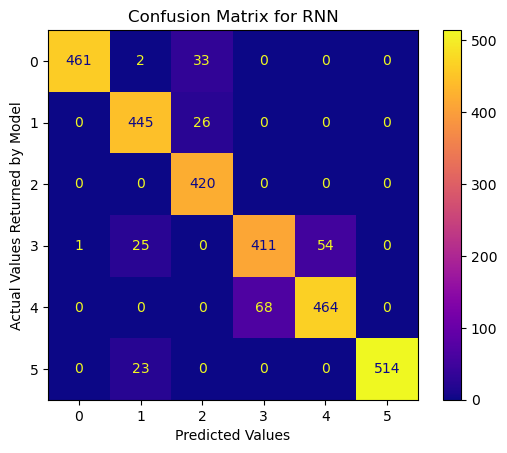

In [38]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot(cmap='plasma')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values Returned by Model")
plt.title("Confusion Matrix for RNN")
# plt.legend(title='Number of matches')
plt.show()